In [1]:
import numpy as np

class GP:
    """ (n, d)-array xtrain and an n-vector ytrain """
    def __init__(self, kernel, sigma=1.0):
        self.kernel = kernel
        self.sigma = sigma
        self.predict = self.posterior
        self.fit = self.add_data
        
    def add_data(self, xtrain, ytrain):
        """ append data, update mu and K """
        self.xtrain = xtrain # hstack(self.xtrain, xtrain)
        self.ytrain = ytrain # hstack(self.ytrain, ytrain)
        self.K = self.kernel(self.xtrain, self.xtrain)
        self.Ky = self.K + self.sigma ** 2 * eye(self.K.shape[0])
        
    def posterior(self, xtest):
        """ compute mu_star, K_star, sigma_star """
        Ks = self.kernel(self.xtrain, xtest)
        Kss = self.kernel(xtest, xtest)
        
        Kyinv = inv(self.Ky)
        KKyT = dot(Ks.T, Kyinv)
        
        mu = dot(KKyT, self.ytrain)
        Ss = Kss - dot(KKyT, Ks) 
        return mu, Ss
    
myGP = GP
    
import scipy.spatial.distance as dist

def sqexp_kernel(x1, x2, ell=.5, sf2=1.0):
    """ x1 and x2 of size (n, d) and (m, d) """
    d = dist.cdist(x1, x2, 'sqeuclidean')
    k = sf2 * exp(-0.5 * d / ell)
    return k

In [14]:
m = 500
n = 30
X = randn(m, n)
a = randn(n)
y = X.dot(a)
x = X[:,0]
X.shape, y.shape

((500, 30), (500,))

((500,), (500,), (500,), (500, 500))

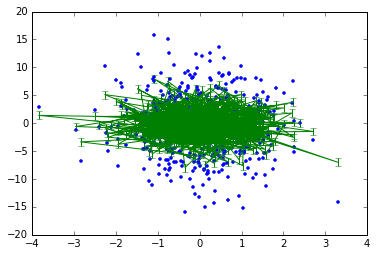

In [24]:
%matplotlib inline
gp = GP(sqexp_kernel, sigma=1)
gp.add_data(X, y)

i = 0
xx = X[:,i].copy()
ia = xx.argsort()
# xx = np.atleast_2d(linspace(x.min(), x.max(), 30)).T
# yy = np.atleast_2d(linspace(y.min(), y.max(), 30)).T
yp, s2 = gp.posterior(X)
plot(xx, y, '.')
errorbar(xx, yp, yerr=np.sqrt(np.diag(s2)))
# show()
xx.shape, y.shape, yp.shape, s2.shape